## Finetuning full iNaturalist model (no layers frozen)

See following repo for guide on building train/test split from df:

https://github.com/CatarinaGouveia/FruitsDetection/blob/main/fruitsDatasetExploration.ipynb

See following blog for detailed overview of Pytorch Finetuning:

https://rumn.medium.com/part-1-ultimate-guide-to-fine-tuning-in-pytorch-pre-trained-model-and-its-configuration-8990194b71e

First download iNaturalist model weights and select resnet50 architecture (https://github.com/visipedia/newt/tree/main/benchmark)

In [1]:
# First go to this dropbox (https://cornell.app.box.com/s/bnyhq5lwobu6fgjrub44zle0pyjijbmw) and generate download popup to get link to wget weights
!wget "https://public.boxcloud.com/d/1/b1!l63o3_5i6MwuJE2gTGnReKFbTMwcoyS5amLmit-JVASLPx7xJPrwnGuu5h6zKlC-MDD0DvdaO_SKVj4VU8rMfWAFUM3D5XqetYLEK_Vbd2R1Sqf9qgabKLBuiyGEeRbHpdhklwA_kQDAxJefFMGVge1AYXLHNCam9Y5ngBtEVWeYXQQ-s_8iYwHz-NuFJ2Z9G7oMrgPXT8QF7__JwImYfv1MyQEdq4jMeJwQXUMOh52gzPtLTm7bEFfL3VLMYkoDu2gxSfaLQVZhBd-ww_fj9jRalUJz4Jk-w4LaswYZIv1Kh5V0obpHWAfeHgwlGmMqkiT5LPXoyBOyNbIcJl62FYqgYpWN2aHB-RG0Ueaq7YujsJdwjd4I2xfVwwUcThGyyGAxVHGezGudhEpCuEQ9SAKBjciuAlrSe4EpnqcB1c5Fzfw5Z7PbChpuQhZyDm43qc7dDe0N-_5PbnWzzQaoDhbiMMyfLK92-7Lp1gZpuRdlSC2H0axoa7xC2IMVFSzHkK_6PYclVzQNtC77BqdRnHAEqwNE1e_lsDyGGt6SPmFLZCo-qVCmE8-WRgjx18HY7hupSqDbYaG5b67CuNEzvT0SVqyUyEqfMwGw8t8Z8csG8__vIRA-xQQzlthxKaqnJ8Aslgnf6CTNNOp7DWtrDxWZz5scblJGIrpTQIxYx8ojuweqYyZlDCCKAa6N6cE4zQ9Stx2NLhLwjkrs7uzDEFM5fOGhL7JLXGGuOpcfS02ajFgomxjhuUGkmRk2Hbbj5ZNCbYZP7MpOaRYEHs02amCEbVf2ZkXOS6E2bXJO608Mm0qsagQt9IS0IELVxiFve_TVsuOK5T2Y9nQSaDCFrqUKo6IT9k0ati6uuMA1O1hAzaeiq9hoE2lXtjsBv5Vhe82RI_QwMd_zGNkNe-AjXVsuxl7QQDjvWTwkFDUdmS9cAEk2dGg6YXExSnn_S6c2VxwuRu6GfdvW9e3N6w18CnecO0qodb_gVt2xpPkhTazK5iKBrwsfylZFk5wxFTalIXR_f6htn6iOo9FfqX7J9-yCy7oBDRZLLDQ7XVNboL28A13cqTyR5Qo6nnLluNfafts-Jv4rh0kQoqAdKaapX25C1gb0MaiNOr8jARM0Bp1mxEPxJum2JnyIlwzwTGm5iv6r95QQFr2sTHnfrv0js1wOiCJ7t-nYd8nbtzTqG4wX9iYqdTlV4EPV2XU2CUyUCIF1yaZtYIqVj7X26XsjLLYAmN3KJ7Z96iM7Q_Ze2IZXhT11d0lrzSMaklrZxNPCTsjEJo3Q4q-xiqbwJqGcXfuNLAKmsDASpQ../download" -O cvpr21_newt_pretrained_models.tar.gz

--2024-07-19 14:25:09--  https://public.boxcloud.com/d/1/b1!l63o3_5i6MwuJE2gTGnReKFbTMwcoyS5amLmit-JVASLPx7xJPrwnGuu5h6zKlC-MDD0DvdaO_SKVj4VU8rMfWAFUM3D5XqetYLEK_Vbd2R1Sqf9qgabKLBuiyGEeRbHpdhklwA_kQDAxJefFMGVge1AYXLHNCam9Y5ngBtEVWeYXQQ-s_8iYwHz-NuFJ2Z9G7oMrgPXT8QF7__JwImYfv1MyQEdq4jMeJwQXUMOh52gzPtLTm7bEFfL3VLMYkoDu2gxSfaLQVZhBd-ww_fj9jRalUJz4Jk-w4LaswYZIv1Kh5V0obpHWAfeHgwlGmMqkiT5LPXoyBOyNbIcJl62FYqgYpWN2aHB-RG0Ueaq7YujsJdwjd4I2xfVwwUcThGyyGAxVHGezGudhEpCuEQ9SAKBjciuAlrSe4EpnqcB1c5Fzfw5Z7PbChpuQhZyDm43qc7dDe0N-_5PbnWzzQaoDhbiMMyfLK92-7Lp1gZpuRdlSC2H0axoa7xC2IMVFSzHkK_6PYclVzQNtC77BqdRnHAEqwNE1e_lsDyGGt6SPmFLZCo-qVCmE8-WRgjx18HY7hupSqDbYaG5b67CuNEzvT0SVqyUyEqfMwGw8t8Z8csG8__vIRA-xQQzlthxKaqnJ8Aslgnf6CTNNOp7DWtrDxWZz5scblJGIrpTQIxYx8ojuweqYyZlDCCKAa6N6cE4zQ9Stx2NLhLwjkrs7uzDEFM5fOGhL7JLXGGuOpcfS02ajFgomxjhuUGkmRk2Hbbj5ZNCbYZP7MpOaRYEHs02amCEbVf2ZkXOS6E2bXJO608Mm0qsagQt9IS0IELVxiFve_TVsuOK5T2Y9nQSaDCFrqUKo6IT9k0ati6uuMA1O1hAzaeiq9hoE2lXtjsBv5Vhe82RI_QwMd_zGNkNe-AjXVsuxl7QQDjvWTwkFDUdmS9c

In [2]:
# Unzip models
!tar -xzf cvpr21_newt_pretrained_models.tar.gz

In [3]:
# Load target model (inat2021_supervised_large)

import torch
from torchvision.models import resnet50

model = resnet50()
num_iNaturalist_classes = 10000 # 10,000 classes including all species
model.fc = torch.nn.Linear(in_features=2048, out_features=num_iNaturalist_classes)

weights_file_path = "cvpr21_newt_pretrained_models/pt/inat2021_supervised_large.pth.tar"
checkpoint = torch.load(weights_file_path, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Reshape final output layer for finetuning (no need to freeze any layers)

In [4]:
# def freeze_weights(model):
#   # freezes all weights
#   for param in model.parameters():
#       param.requires_grad = False

# def unfreeze_layer4(model):
#   # unfreezes weights in layer4
#   for param in model.layer4.parameters():
#       param.requires_grad = True


In [5]:
num_classes = 5 # {Grass, Clover, Soil, Dung, Artifact}

# Modify the model head
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, num_classes)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Download dataset (V2) for finetuning

In [6]:
!wget https://sensor-cdt-group-project.s3.eu-north-1.amazonaws.com/data.zip -O finetune_data.zip
!mkdir -p finetune_data
!unzip -q finetune_data.zip -d finetune_data

--2024-07-19 14:29:19--  https://sensor-cdt-group-project.s3.eu-north-1.amazonaws.com/data.zip
Resolving sensor-cdt-group-project.s3.eu-north-1.amazonaws.com (sensor-cdt-group-project.s3.eu-north-1.amazonaws.com)... 3.5.217.70, 3.5.216.57
Connecting to sensor-cdt-group-project.s3.eu-north-1.amazonaws.com (sensor-cdt-group-project.s3.eu-north-1.amazonaws.com)|3.5.217.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1751308166 (1.6G) [binary/octet-stream]
Saving to: ‘finetune_data.zip’

finetune_data.zip   100%[===================>]   1.63G  12.6MB/s    in 2m 18s  

2024-07-19 14:31:38 (12.1 MB/s) - ‘finetune_data.zip’ saved [1751308166/1751308166]



In [7]:
# check metadata csv file (dataset-v2.csv) is in google drive

# mount google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# peek contents of dataset-v2.csv
!head /content/drive/MyDrive/team_challenge/dataset-v2.csv

Mounted at /content/drive
"annotation_id","annotator","choice","created_at","id","image","lead_time","updated_at"
120,"4","Grass","2024-07-11T09:42:46.334102Z",18157,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_0_194.jpg",11.992,"2024-07-11T09:42:46.334134Z"
225,"4","{""choices"":[""Grass"",""Soil""]}","2024-07-11T10:07:20.670501Z",18166,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_1164_776.jpg",2.832,"2024-07-11T10:07:20.670533Z"
231,"4","Grass","2024-07-11T10:07:38.852906Z",18168,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_1358_0.jpg",7.948,"2024-07-11T10:07:38.852941Z"
232,"4","{""choices"":[""Grass"",""Soil""]}","2024-07-11T10:07:43.762465Z",18169,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_1358_194.jpg",4.056,"2024-07-11T10:07:43.762499Z"
235,"4","{""choices"":[""Grass"",""Soil""]}","2024-07-11T10:08:06.786139Z",18171,"/data/local-files/?d=content/content/flat_split/Bare%20Soil_Fran_0_135

Prepare dataset for finetuning

In [8]:
# Function for handling JSON data in 'choice' column
import json

def parse_json_choice(json_string):
  # Return the choices in form of a list e.g.:
  # input: '{"choices":["Grass","Soil"]}'
  # output: ["Grass","Soil"]
  json_data = json.loads(json_string)

  return json_data['choices']

In [9]:
# Generate df, make image_name column, assign labels

import pandas as pd

csv_path = "/content/drive/MyDrive/team_challenge/dataset-v2.csv"
main_df = pd.read_csv(csv_path)
main_df['image_name'] = main_df['image'].apply(lambda x: x.split('/')[-1].replace('%20', ' ')) # Ensure URL encoded spaces are replaced

# Handling multi class labels in the 'choices' column
priority = ['Clover', 'Dung', 'Soil', 'Artifact', 'Grass']

df_labels = []
for index, row in main_df.iterrows():
  if type(row['choice']) != str:
    df_labels.append(None)
  elif '{"choices":' in row['choice']:
    row_choices = parse_json_choice(row['choice']) # row choices a list e.g. ['Grass', 'Soil']
    if 'Sheep Dung' in row_choices:
      row_choices.remove('Sheep Dung')
    label = next((item for item in priority if item in row_choices), None) # Assign a single label based on priority list
    df_labels.append(label)
  else:
    df_labels.append(row['choice'])

main_df['label'] = df_labels

main_df

,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,image_name,label
0,120,4,Grass,2024-07-11T09:42:46.334102Z,18157,/data/local-files/?d=content/content/flat_spli...,11.992,2024-07-11T09:42:46.334134Z,Bare Soil_Fran_0_0_194.jpg,Grass
1,225,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:07:20.670501Z,18166,/data/local-files/?d=content/content/flat_spli...,2.832,2024-07-11T10:07:20.670533Z,Bare Soil_Fran_0_1164_776.jpg,Soil
2,231,4,Grass,2024-07-11T10:07:38.852906Z,18168,/data/local-files/?d=content/content/flat_spli...,7.948,2024-07-11T10:07:38.852941Z,Bare Soil_Fran_0_1358_0.jpg,Grass
3,232,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:07:43.762465Z,18169,/data/local-files/?d=content/content/flat_spli...,4.056,2024-07-11T10:07:43.762499Z,Bare Soil_Fran_0_1358_194.jpg,Soil
4,235,4,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:08:06.786139Z,18171,/data/local-files/?d=content/content/flat_spli...,17.455,2024-07-11T10:08:06.786172Z,Bare Soil_Fran_0_1358_582.jpg,Soil
...,...,...,...,...,...,...,...,...,...,...
2923,161,3,Grass,2024-07-11T10:01:17.978649Z,98643,/data/local-files/?d=content/content/flat_spli...,1.779,2024-07-11T10:01:17.978677Z,Sheep Wool_Leon_895_582_970.jpg,Grass
2924,1063,3,Grass,2024-07-12T09:31:22.721232Z,99078,/data/local-files/?d=content/content/flat_spli...,1.625,2024-07-12T09:31:22.721263Z,Sheep Wool_Leon_900_582_1312.jpg,Grass
2925,1061,3,"{""choices"":[""Grass"",""Soil""]}",2024-07-12T09:31:17.727774Z,100732,/data/local-files/?d=content/content/flat_spli...,2.451,2024-07-12T09:31:17.727804Z,Sheep Wool_Leon_919_194_0.jpg,Soil
2926,207,3,Grass,2024-07-11T10:05:55.685947Z,106714,/data/local-files/?d=content/content/flat_spli...,2.392,2024-07-11T10:05:55.685980Z,Unclassified_Maxwell_1028_1948_776.jpg,Grass


In [10]:
# Rebalance dataset (see 240716_datasetV2_exploration.ipynb for details)

from sklearn.utils import resample

main_df_noNaN = main_df.dropna(subset=['label']) # remove images without labels

df_grass = main_df_noNaN[main_df_noNaN['label'] == 'Grass']
df_not_grass = main_df_noNaN[main_df_noNaN['label'] != 'Grass']

target_grass_count = len(df_not_grass)

df_grass_downsampled = resample(df_grass,
                              replace=False,
                              n_samples=target_grass_count,
                              random_state=0)

main_df_resampled = pd.concat([df_grass_downsampled, df_not_grass])

main_df_resampled

,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,image_name,label
2076,1691,5,Grass,2024-07-13T16:21:18.621619Z,38464,/data/local-files/?d=content/content/flat_spli...,2.395,2024-07-13T16:21:18.621638Z,Clover_Livia_227_776_0.jpg,Grass
620,2922,5,Grass,2024-07-15T19:29:09.918822Z,39565,/data/local-files/?d=content/content/flat_spli...,4.331,2024-07-15T19:29:09.919226Z,Clover_Maxwell_239_1948_1164.jpg,Grass
2149,1912,5,Grass,2024-07-13T16:38:11.520850Z,38687,/data/local-files/?d=content/content/flat_spli...,1.849,2024-07-13T16:38:11.520868Z,Clover_Livia_230_1358_388.jpg,Grass
1072,865,1,Grass,2024-07-11T15:23:50.284189Z,38047,/data/local-files/?d=content/content/flat_spli...,2.004,2024-07-11T15:23:50.284219Z,Clover_Leon_223_0_970.jpg,Grass
2182,2043,5,Grass,2024-07-13T16:47:10.446406Z,38819,/data/local-files/?d=content/content/flat_spli...,2.554,2024-07-13T16:47:10.446425Z,Clover_Livia_231_582_1358.jpg,Grass
...,...,...,...,...,...,...,...,...,...,...
2906,192,3,"{""choices"":[""Dung"",""Soil""]}",2024-07-11T10:04:02.603484Z,57525,/data/local-files/?d=content/content/flat_spli...,20.037,2024-07-11T10:04:02.603513Z,Cow Dung_Stev_432_1312_1552.jpg,Dung
2907,358,3,"{""choices"":[""Grass"",""Artifact""]}",2024-07-11T10:14:27.624847Z,58604,/data/local-files/?d=content/content/flat_spli...,4.607,2024-07-11T10:14:27.624895Z,Dock Leaves_Fran_444_970_388.jpg,Artifact
2909,452,3,"{""choices"":[""Grass"",""Soil""]}",2024-07-11T10:18:51.088092Z,66868,/data/local-files/?d=content/content/flat_spli...,6.279,2024-07-11T10:18:51.088123Z,Dock Leaves_Leon_539_194_0.jpg,Soil
2918,2253,2,"{""choices"":[""Grass"",""Artifact""]}",2024-07-13T18:01:30.791131Z,87511,/data/local-files/?d=content/content/flat_spli...,17.023,2024-07-13T18:01:30.791149Z,OV3XXX_4_970_970.jpg,Artifact


Prepare data for finetuning

In [11]:
# define dataset class

from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import os


class CustomDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
        self.label_map = {'Grass': 0, 'Clover': 1, 'Soil': 2, 'Dung': 3, 'Artifact': 4}
        self.class_names = list(self.label_map.keys())
        self.image_paths = [os.path.join(self.img_dir, img_name) for img_name in self.dataframe.iloc[:, 8]]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.image_paths[idx]
        image = Image.open(img_name).convert("RGB")
        label = self.label_map[self.dataframe.iloc[idx, 9]]

        if self.transform:
            image = self.transform(image)

        return image, label

    def get_image_path(self, idx):
        return self.image_paths[idx]

    def get_labels(self, idx):
        return self.dataframe.iloc[idx, 9]

# define transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [12]:
# Create dataset object

img_dir = 'finetune_data/content/content/flat_split/'

dataset = CustomDataset(dataframe=main_df_resampled, img_dir=img_dir, transform=transform)

label_map = dataset.label_map
print(label_map)

{'Grass': 0, 'Clover': 1, 'Soil': 2, 'Dung': 3, 'Artifact': 4}


In [13]:
# Perform train, val, test split and create DataLoaders

from torch.utils.data import DataLoader, random_split

# Split the dataset into train/val/test sets (0.7, 0.15, 0.15 ratio)
generator1 = torch.Generator().manual_seed(42) # for reproducible splitting
train_set, val_set, test_set = random_split(dataset, [0.7, 0.15, 0.15], generator=generator1)

# Create DataLoaders for each set
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Print dataset sizes
print(f'Train set size: {len(train_set)}')
print(f'Validation set size: {len(val_set)}')
print(f'Test set size: {len(test_set)}')

Train set size: 1240
Validation set size: 265
Test set size: 265


Fine tune model

In [14]:
import torch
import keras
import torch.nn as nn
import torch.optim as optim
import time

# Fine-tuning function
def fine_tune(model, train_loader, val_loader, optimiser, loss_function, num_epochs=10):

    ''' Inspired by https://keras.io/guides/writing_a_custom_training_loop_in_torch/ '''

    start = time.time()

    # Use keras function for computing accuracy
    train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
    val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

    # lists to store loss/accuracy tuples of each epoch
    epoch_train_stats = []
    epoch_val_stats = []

    for epoch in range(num_epochs):

        # Set model to training mode
        model.train()

        running_loss = 0.0
        num_batches = 0

        for inputs, targets in train_loader:

            inputs = inputs.to(device)  # Assuming 'device' is properly set
            targets = targets.to(device)

            optimiser.zero_grad()

            # Forward pass
            logits = model(inputs)
            loss = loss_function(logits, targets)

            # Backward pass
            loss.backward()

            # Optimiser variable updates
            optimiser.step()

            # Update training metric
            # train_acc_metric.update_state(targets, logits)
            train_acc_metric.update_state(targets.cpu().detach().numpy(), logits.cpu().detach().numpy())

            # Increment loss & batch count
            running_loss += loss.item()
            num_batches += 1

        # Get train loss & accuracy for the epoch
        train_epoch_loss = running_loss / num_batches
        train_epoch_acc = train_acc_metric.result()
        epoch_train_stats.append((train_epoch_loss,train_epoch_acc))

        # Run a validation loop at the end of each epoch
        model.eval()
        val_running_loss = 0.0
        val_num_batches = 0

        with torch.no_grad():
            for x_batch_val, y_batch_val in val_loader:
                x_batch_val = x_batch_val.to(device)
                y_batch_val = y_batch_val.to(device)

                # Forward pass
                val_logits = model(x_batch_val)
                val_loss = loss_function(val_logits, y_batch_val)

                # Update validation metrics
                # val_acc_metric.update_state(y_batch_val, val_logits)
                val_acc_metric.update_state(y_batch_val.cpu().detach().numpy(), val_logits.cpu().detach().numpy())

                # Increment validation loss & batch count
                val_running_loss += val_loss.item()
                val_num_batches += 1

        # Get val loss & accuracy for the epoch
        val_epoch_loss = val_running_loss / val_num_batches
        val_epoch_acc = val_acc_metric.result()
        epoch_val_stats.append((val_epoch_loss, val_epoch_acc))

        # Reset metrics at the end of each epoch
        train_acc_metric.reset_state()
        val_acc_metric.reset_state()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train loss: {train_epoch_loss:.2f}, Train accuracy: {train_epoch_acc:.2f}')


    elapsed_time = time.time() - start
    print('Fine-tuning complete in {:.0f}m {:.0f}s'.format(elapsed_time // 60, elapsed_time % 60))

    return model, epoch_train_stats, epoch_val_stats

In [15]:
# Define loss function and optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate as needed

# Detect if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Fine-tune the model
model, train_stats, val_stats = fine_tune(model, train_loader, val_loader, optimiser, loss_function, num_epochs=10)

Epoch [1/10], Train loss: 1.00, Train accuracy: 0.69
Epoch [2/10], Train loss: 0.62, Train accuracy: 0.80
Epoch [3/10], Train loss: 0.51, Train accuracy: 0.84
Epoch [4/10], Train loss: 0.44, Train accuracy: 0.86
Epoch [5/10], Train loss: 0.30, Train accuracy: 0.90
Epoch [6/10], Train loss: 0.27, Train accuracy: 0.91
Epoch [7/10], Train loss: 0.26, Train accuracy: 0.92
Epoch [8/10], Train loss: 0.31, Train accuracy: 0.91
Epoch [9/10], Train loss: 0.24, Train accuracy: 0.91
Epoch [10/10], Train loss: 0.15, Train accuracy: 0.96
Fine-tuning complete in 2m 35s


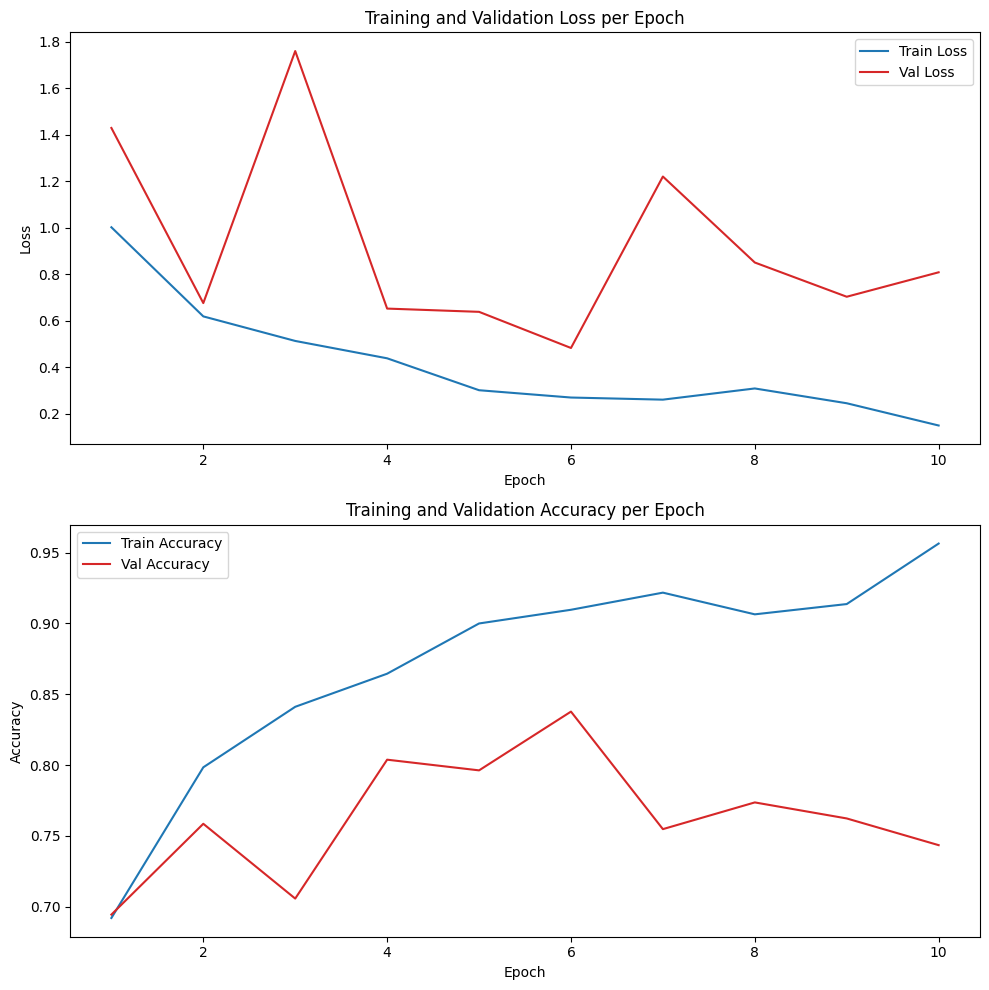

In [17]:
# Plot training history

import matplotlib.pyplot as plt

epochs = range(1, len(train_stats) + 1)
train_losses = [entry[0] for entry in train_stats]
train_accuracies = [entry[1] for entry in train_stats]
val_losses = [entry[0] for entry in val_stats]
val_accuracies = [entry[1] for entry in val_stats]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

train_colour = 'tab:blue'
val_colour = 'tab:red'
# Plotting loss
ax1.plot(epochs, train_losses, label='Train Loss', color=train_colour)
ax1.plot(epochs, val_losses, label='Val Loss', color=val_colour)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss per Epoch')
ax1.legend()

# Plot accuracy
ax2.plot(epochs, train_accuracies, label='Train Accuracy', color=train_colour)
ax2.plot(epochs, val_accuracies, label='Val Accuracy', color=val_colour)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy per Epoch')
ax2.legend()

plt.tight_layout()
plt.show()

In [18]:
# Function for reporting model performance

from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
import seaborn as sns

def model_evaluation(true_labels, predicted_labels, label_map):

  class_names = [label for label in label_map.keys()]

  conf_matrix = confusion_matrix(true_labels, predicted_labels)

  print("Confusion Matrix:")
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
              xticklabels=class_names,
              yticklabels=class_names,
              ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')

  plt.show()


  class_report = classification_report(true_labels, predicted_labels, target_names=class_names)

  print("Classification Report:")
  print(class_report)

  cohen_kappa = cohen_kappa_score(true_labels, predicted_labels)

  print("Cohen's kappa score:")
  print(cohen_kappa)

Confusion Matrix:


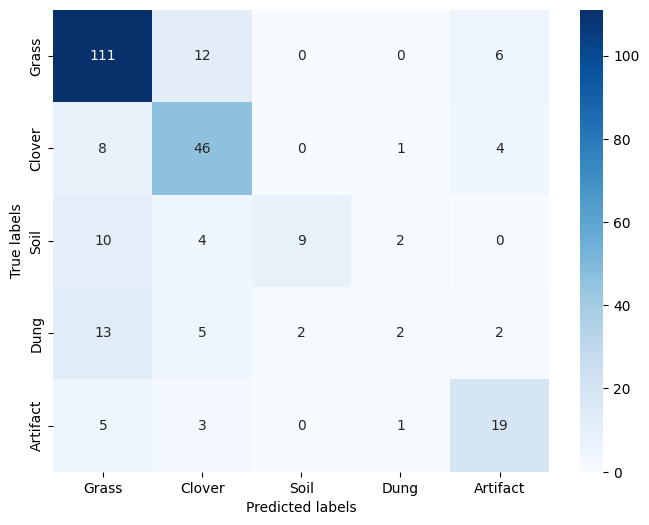

Classification Report:
              precision    recall  f1-score   support

       Grass       0.76      0.86      0.80       129
      Clover       0.66      0.78      0.71        59
        Soil       0.82      0.36      0.50        25
        Dung       0.33      0.08      0.13        24
    Artifact       0.61      0.68      0.64        28

    accuracy                           0.71       265
   macro avg       0.64      0.55      0.56       265
weighted avg       0.69      0.71      0.68       265

Cohen's kappa score:
0.5491329479768786


In [19]:
# Evaulate model on test set

import numpy as np

model.eval()

predictions = []
true_labels = []

with torch.no_grad():
  for data in test_set:
      inputs, label = data
      inputs = inputs.unsqueeze(0).to(device)   # Add batch dimension
      output = model(inputs)
      _, prediction = torch.max(output, 1)
      predictions.append(prediction.item())
      true_labels.append(label)

  predictions = np.array(predictions)
  true_labels = np.array(true_labels)

# Report performance
model_evaluation(true_labels, predictions, label_map)